# Task 1: Resources (10 Points) 
Assuming you are not familiar with the framework, in this part of the 
homework you will present your research describing the resources you used to learn the 
framework (must include links to all resources). Clearly explain why you needed a particular 
resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of 
all the computations in a NN i.e., what libraries/tools do you need within this framework.)

# Task 2: Data & Implementation (60 Points)
Once you have figured the resources you need for the project, design, and 
implement your project. The project must include the following steps (it’s not limited to these 
steps): 
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.) 
2. Perform a train-dev-test split. 
3. Implement forward propagation (clearly describe the activation functions and other 
hyper-parameters you are using). 
4. Compute the final cost function. 
5. Implement gradient descent (any variant of gradient descent depending upon your 
data and project can be used) to train your model. In this step it is up to you as someone 
in charge of their project to improvise using optimization algorithms (Adams, RMSProp 
etc.) and/or regularization.  
6. Present the results using the test set. 

NOTE: In this step, once you have implemented your 2-layer network you may increase and/or 
decrease the number of layers as part of the hyperparameter tuning process.

## Step 1: Problem, Dataset, Exploratory Data Analysis

For this work we select the [shuttle dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+(Shuttle)) and its task of classifying what means of control should be employed while landing the space shuttle based on the 9 features are signals derived from radiator sensors and the time at which they happened. The dataset is already split for us initially so that there is a good distribution of features is maintained across the slit, but we will combine it first and re-split it with a validation set as well for step 2.

In [8]:
import pandas as pd

#create our column names
feature_names = [f"x_{i}" for i in range(9)]
col_names = feature_names + ["y"]

#get our split datasets
old_testing = pd.read_csv("./data/shuttle.trn", names=col_names, sep=" ")
old_training = pd.read_csv("./data/sat.tst", names=col_names, sep=" ")

#combine them into a single dataset for exploratory data analysis.
data = pd.concat([old_testing, old_training])

#print if we have any NaNs or nulls in the dataset
print("NaNs or Nulls present: " + str(data.isnull().values.any()))
data.head()

NaNs or Nulls present: False


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,y
0,50,21,77,0,28,0,27,48,22,2
1,55,0,92,0,0,26,36,92,56,4
2,53,0,82,0,52,-5,29,30,2,1
3,37,0,76,0,28,18,40,48,8,1
4,37,0,79,0,34,-26,43,46,2,1


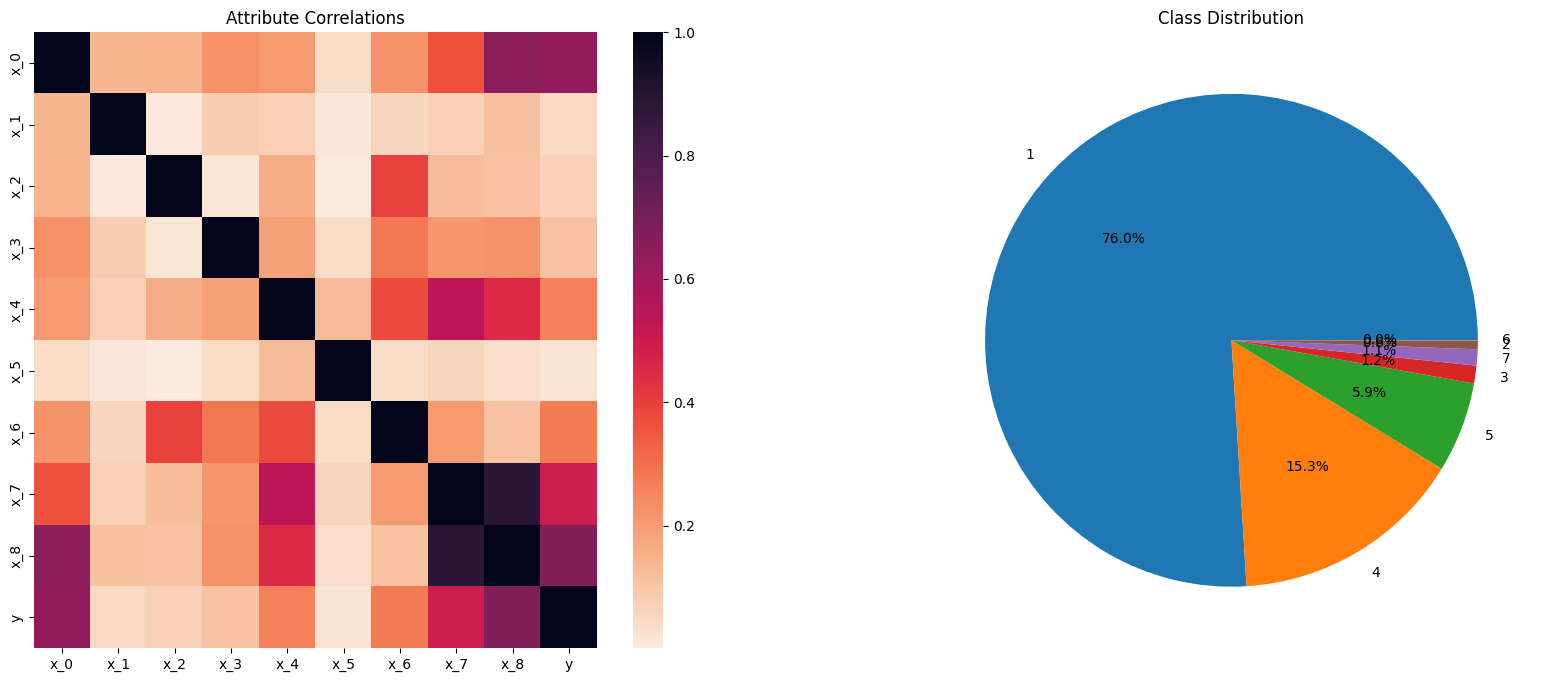

In [13]:
from turtle import title
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(20,8))
#ax[0].imshow(data_raw.corr().abs(), cmap='rocket_r')
ax[0].set_title("Attribute Correlations")
sns.heatmap(data.corr().abs(),annot=False, ax=ax[0], cmap='rocket_r')
ax[1].set_title("Class Distribution")
ax[1].pie(x=data["y"].value_counts(), labels=data["y"].value_counts().index, autopct='%1.1f%%');

The corelation heatmap shows some medium corelation between our class and attributes 1 and 8, the rest have relatively low corelation. Our pie chart of class distribution shows a massive class imbalance, with class 1 composing nearly 80% of instances. This high imbalance, combined with stringent consequences for false negatives (millions of dollars of infrastructure are on the line for this decision problem), F1 score is the best metric for measuring performance on this task. 

## Step 2: Data split

When splitting the data, we need to ensure that our very specific class distribution is maintained to the very best of our ability. To ensure this, we use the stratify parameter in the train_test_split to provide class labels, which causes train_test_split to use StratifiedShuffleSplit on the backend which shuffles while maintaining portions of each class. 

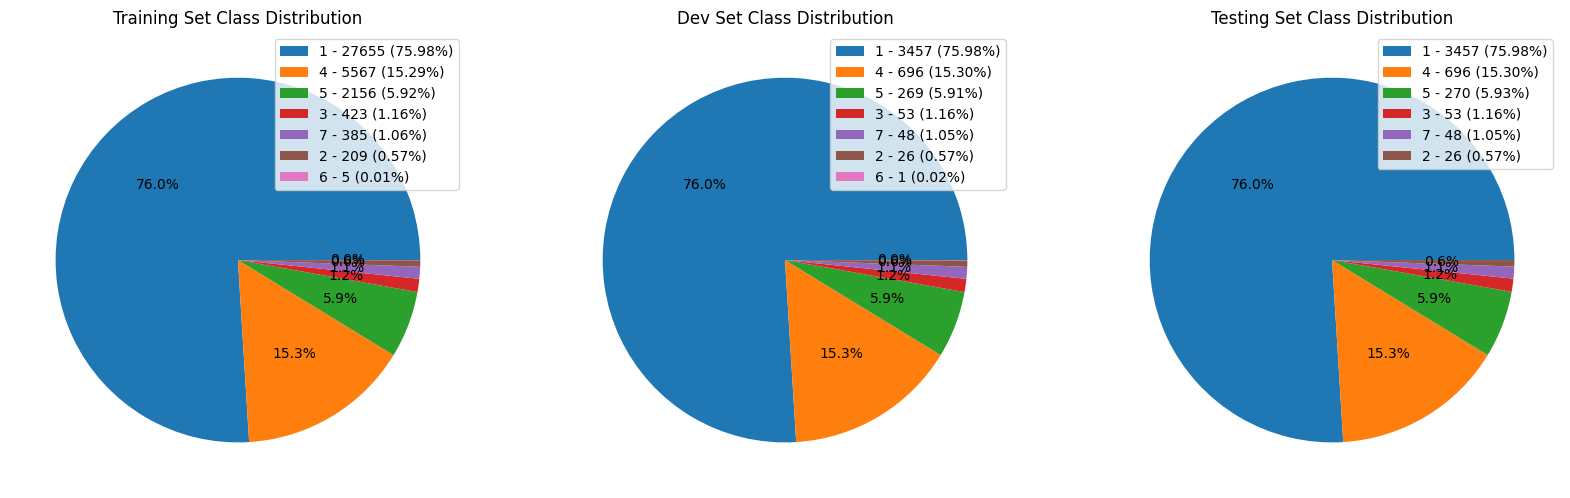

In [56]:
import math
import numpy as np
from sklearn.model_selection import train_test_split

training_percent = 0.8
testing_percent = 0.1
assert(0 < training_percent+testing_percent <= 1)
remainder_size = math.floor((training_percent+testing_percent) * data.shape[0])
testing_size = math.floor(testing_percent * data.shape[0])

x_dev, x_remainder, y_dev, y_remainder = train_test_split(data[feature_names], data["y"], test_size=remainder_size, stratify=data["y"])
x_train, x_test, y_train, y_test = train_test_split(x_remainder, y_remainder, test_size=testing_size, stratify=y_remainder)

#demonstrate our datasets have the same class distributions
fig, ax = plt.subplots(ncols=3, figsize=(20,8))

def pie_chart(axis_index, name, labels):
    unique_labels = np.transpose(np.unique(labels, return_counts=True))
    sorted_labels = np.transpose(unique_labels[unique_labels[:, 1].argsort()[::-1]])
    ax[axis_index].set_title(name + " Set Class Distribution")
    slices, texts, _ = ax[axis_index].pie(sorted_labels[1]);

    pie_labels = [str(i) + " - {} ({:.2f}%)".format(j , 100*float(j/len(labels))) for i, j in  zip(sorted_labels[0], sorted_labels[1])]
    ax[axis_index].legend(slices, pie_labels)

pie_chart(0, "Training", y_train)
pie_chart(1, "Dev", y_dev)
pie_chart(2, "Testing", y_test)

We see that the split is successful in a broad sense, the only problem class being class 6 which doesn't really have enough examples in the dataset to be useful for us anyway.  

# Step 3: Implementing the forward pass

In [ ]:
import torch



torch.Tensor()

# Task 3: Hyperparameter Justification (10 Points)
In task 2 describe how you selected the hyperparameters. What was the 
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use 
an optimization algorithm? Why or why not?

# Task 4: Baseline Comparision (20 Points)
Create another baseline model (can be any model we covered so far except a 
deep learning model). Using the same training data (as above) train your model and evaluate 
results using the test set. Compare the results of both models (the Neural Network and the 
baseline model). What are the reasons for one model performing better (or not) than the 
other? Explain.